In [1]:
import pandas as pd 
df=pd.read_excel("data.xlsx") # Path of the file. 
df.to_pickle("data.pkl")


Text(0.5, 1.0, 'Makalelerin Ülkelere Göre Dağılımı: Web of Science ve Springer')

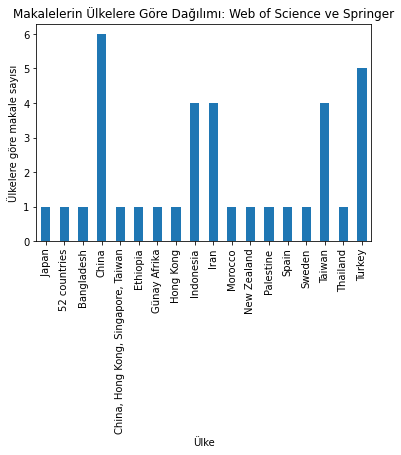

In [2]:
groups = df.groupby('country')
counts = groups.size()
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar')
plt.xlabel('Ülke')
plt.ylabel('Ülkelere göre makale sayısı')
plt.title('Makalelerin Ülkelere Göre Dağılımı: Web of Science ve Springer')

In [3]:
import pandas as pd 
df=pd.read_excel("data.xlsx") # Path of the file. 
df.to_pickle("data.pkl")


Text(0.5, 1.0, 'Makalelerin Kıtalara Göre Dağılımı: Web of Science ve Springer')

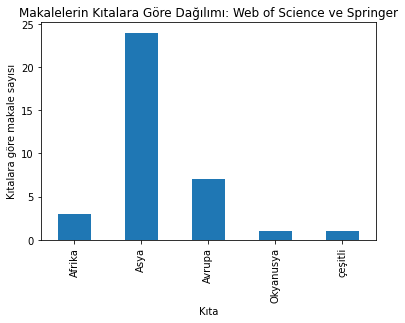

In [4]:
groups = df.groupby('continent')
counts = groups.size()
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar')
plt.xlabel('Kıta')
plt.ylabel('Kıtalara göre makale sayısı')
plt.title('Makalelerin Kıtalara Göre Dağılımı: Web of Science ve Springer')

Text(0.5, 1.0, 'Makalelerin Yıllara Göre Dağılımı: Web of Science ve Springer')

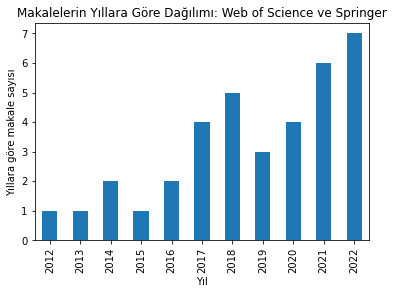

In [6]:
groups = df.groupby('year')
counts = groups.size()
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar')
plt.xlabel('Yıl')
plt.ylabel('Yıllara göre makale sayısı')
plt.title('Makalelerin Yıllara Göre Dağılımı: Web of Science ve Springer')

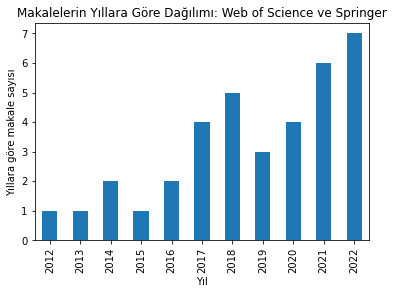

In [7]:
# %%
groups = df.groupby('year')
counts = groups.size()
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar')
plt.xlabel('Yıl')
plt.ylabel('Yıllara göre makale sayısı')
plt.title('Makalelerin Yıllara Göre Dağılımı: Web of Science ve Springer')

perc = (groups.size()) * 100 / len(groups)

In [23]:
import pandas as pd 
df=pd.read_excel("data.xlsx")
df['year'].value_counts()


2022    7
2021    6
2018    5
2017    4
2020    4
2019    3
2014    2
2016    2
2015    1
2013    1
2012    1
Name: year, dtype: int64

In [24]:
import pandas as pd 
df=pd.read_excel("data.xlsx")
df['year'].value_counts(normalize=True)


2022    0.194444
2021    0.166667
2018    0.138889
2017    0.111111
2020    0.111111
2019    0.083333
2014    0.055556
2016    0.055556
2015    0.027778
2013    0.027778
2012    0.027778
Name: year, dtype: float64

<AxesSubplot:>

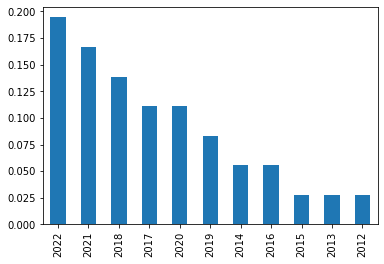

In [25]:
import pandas as pd 
df=pd.read_excel("data.xlsx")
df['year'].value_counts(normalize=True).plot(kind='bar')


<AxesSubplot:>

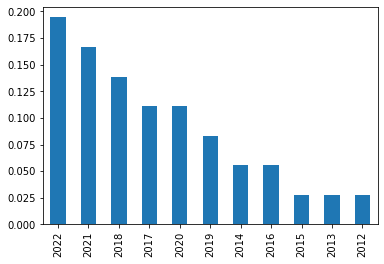

In [26]:
import pandas as pd 
df=pd.read_excel("data.xlsx")
df['year'].value_counts(normalize=True, ascending=False).plot(kind='bar')


<AxesSubplot:ylabel='year'>

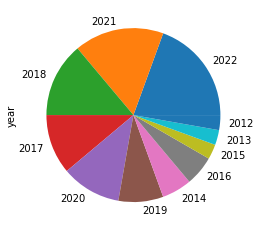

In [27]:
import pandas as pd 
df=pd.read_excel("data.xlsx")
df['year'].value_counts(normalize=True, ascending=False).plot(kind='pie')


<AxesSubplot:>

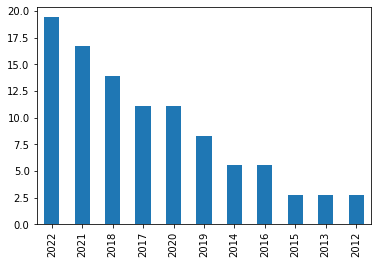

In [29]:
import pandas as pd 
df=pd.read_excel("data.xlsx")
df['year'].value_counts(normalize=True, ascending=False).mul(100).round(1).plot(kind='bar')



In [32]:
import pandas as pd 
df=pd.read_excel("data.xlsx")
prc = df['year'].value_counts(normalize=True, ascending=False).mul(100).round(1)
print(prc)



2022    19.4
2021    16.7
2018    13.9
2017    11.1
2020    11.1
2019     8.3
2014     5.6
2016     5.6
2015     2.8
2013     2.8
2012     2.8
Name: year, dtype: float64


In [34]:
import numpy as np
import re, nltk, spacy, gensim
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# %%
# %%
df = pd.read_pickle('data.pkl')
doc = df['abstract'].map(lambda x: x.lower())

# Convert to list
data = doc.values.tolist()
# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]

In [35]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

data_words = list(sent_to_words(data))

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
data_lemmatized = lemmatization(data_words, allowed_postags=["NOUN","ADJ"]) #select noun and verb


In [36]:
print(data_lemmatized)

['paper study technology english language elt important language society bridge different race society circumstance twentyfirst century education english language teaching elt industrial technology important part potential teaching process learning second language esl purpose technological pedagogical content knowledge tpack correlation technology pedagogy content knowledge english teacher technology tool english teaching reason teacher tpack questionnaire different questionnaire english teacher technology elt purpose questionnaire different major questionnaire neighbour previous sentence research questionnaire content validation expert more year teaching experience subject methodology research quantitative method datum form descriptive statistic content value index value validity datum form table datum result finding research face content validity result high reliability validity adapted questionnaire further research pilot study efficiency instrument', 'technological pedagogical cont

In [37]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['the', 'findings', 'using', 'use', 'research', 'data', 'qualitative', 'survey', 'study', 'result',
 'results', 'also', 'in', 'a', 'an', 'finding', 'paper', 'discuss', 'maxqda', 'end', 'phase', 'sample', 'demonstrate',
  'aim', 'need', 'make', 'factor','variable', 'factorsof', 'datum', 'report', 'includ', 'analysis','mean', 'score',
   'deviation', 'calculate', 'statistic', 'frequency', 'percentage', 'relate','reveal', 'index', 'show', 'investigate',
    'interview', 'questionnaire', 'total', 'identife', 'cart', 'include', 'case', 'carry', 'ask', 'imply', 'article',
     'examine', 'obtain', 'test', 'analyze', 'repeat', 'measure', 'variance', 'assess', 'find', 'validity', 'equation',
      'hypothesesabout', 'element', 'address', 'synthesize', 'fill', 'gap', 'method', 'examine', 'answer', 'eliminate',
       'arise', 'interpret', 'methodology', 'validation', 'value', 'validity', 'prove', 'reliability', 'hold', 'purpose',
        'subject', 'literature', 'area', 'conduct', 'collect', 'question', 'according', 'accord', 'age', 'differ', 'scale',
         'collection', 'process', 'sampling', 'correlation', 'regression', 'diferent', 'cite', 'dictum', 'enable', 'surpass',
          'highlight', 'see', 'consider', 'participant', 'take', 'part', 'gather', 'express', 'researcher', 'require', 'analyse',
           'become', 'indicate', 'chart', 'record', 'reference', 'pattern', 'claim', 'observe', 'pilot', 'table', 'interval',
            'reality', 'form', 'propose', 'firewall', 'conclude', 'mixed', 'quantitative', 'various', 'related', 'field', 'standard',
            'project', 'field', 'concept', 'theory', 'open', 'ended', 'new', 'context', 'positive', 'issue', 'current', 'support', 'system',
            'various', 'critical', 'outcomes', 'concept', 'descriptive', 'different', 'example', 'instrument', 'work', 'important', 
            'time', 'resources', 'resource', 'framework', 'aspect', 'potential', 'principle', 'theoretical', 'technical', 'model', 
            'suggestion', 'valid', 'implication', 'approach', 'year'])

texts = [[word for word in document.split() if word not in stop_words]
         for document in data_lemmatized]

In [38]:
from collections import defaultdict
# %%
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]


In [39]:
print(texts)

[['technology', 'english', 'language', 'elt', 'language', 'society', 'society', 'twentyfirst', 'century', 'education', 'english', 'language', 'teaching', 'elt', 'technology', 'teaching', 'learning', 'second', 'language', 'technological', 'pedagogical', 'content', 'knowledge', 'tpack', 'technology', 'pedagogy', 'content', 'knowledge', 'english', 'teacher', 'technology', 'tool', 'english', 'teaching', 'reason', 'teacher', 'tpack', 'english', 'teacher', 'technology', 'elt', 'major', 'previous', 'content', 'expert', 'teaching', 'experience', 'content', 'face', 'content', 'high', 'adapted'], ['technological', 'pedagogical', 'content', 'knowledge', 'tpack', 'instructional', 'technology', 'education', 'technological', 'pedagogical', 'content', 'knowledge', 'overview', 'teacher', 'education', 'english', 'language', 'teacher', 'education', 'particular', 'structured', 'experienced', 'english', 'language', 'teacher', 'plasma', 'instruction', 'classroom', 'teacher', 'plasma', 'lesson', 'order', 't

In [40]:
from gensim import corpora, models
from gensim.models import Phrases
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
%matplotlib inline

# %%
bigram = Phrases(texts, min_count=2)
for idx in range(len(texts)):
    for token in bigram[texts[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            texts[idx].append(token)

trigram = Phrases(texts, min_count=2)
for idx in range(len(texts)):
    for token in trigram[texts[idx]]:
        if '_' in token:
            # Token is a trigram, add to document.
            texts[idx].append(token)
n= 4
ngram = Phrases(texts, min_count=2)
for idx in range(len(texts)):
    for token in ngram[texts[idx]]:
        if '_' in token:
            # Token is a ngram, add to document.
            texts[idx].append(token)


/usr/local/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [41]:
# Create the dictionary
dictionary = corpora.Dictionary(texts)

# Filter out words that occur less than X documents, 
# or more than X% of the documents.
dictionary.filter_extremes(no_below=3, no_above=0.4) # => below 3 ? 2 ? 

# Create the corpus.  This is a Term Frequency 
# or Bag of Words representation.
corpus = [dictionary.doc2bow(text) for text in texts]

print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of documents: {len(corpus)}')

Number of unique tokens: 98
Number of documents: 36


In [42]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)

NUM_TOPICS = 5
chunksize = 6
passes = 10
iterations = 100
eval_every = 1
temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha=0.01,
    eta='symmetric',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)

2022-07-27 13:15:45,182 : INFO : using symmetric eta at 0.2
2022-07-27 13:15:45,187 : INFO : using serial LDA version on this node
2022-07-27 13:15:45,197 : INFO : running online (multi-pass) LDA training, 5 topics, 10 passes over the supplied corpus of 36 documents, updating model once every 6 documents, evaluating perplexity every 6 documents, iterating 100x with a convergence threshold of 0.001000
2022-07-27 13:15:45,198 : DEBUG : bound: at document #0
2022-07-27 13:15:45,216 : INFO : -5.294 per-word bound, 39.2 perplexity estimate based on a held-out corpus of 6 documents with 228 words
2022-07-27 13:15:45,216 : INFO : PROGRESS: pass 0, at document #6/36
2022-07-27 13:15:45,216 : DEBUG : performing inference on a chunk of 6 documents
2022-07-27 13:15:45,222 : DEBUG : 5/6 documents converged within 100 iterations
2022-07-27 13:15:45,222 : DEBUG : updating topics
2022-07-27 13:15:45,222 : INFO : merging changes from 6 documents into a model of 36 documents
2022-07-27 13:15:45,226 : I

In [43]:
def compute_coherence_values(dictionary, corpus, texts, 
                             cohere, limit, start=2, step=1):

    coherence_values = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, 
                         id2word=dictionary, 
                         num_topics=num_topics,
                         chunksize=chunksize,
                         alpha=0.01,
                         eta='symmetric',
                         iterations=iterations,
                         passes=passes,
                         eval_every=eval_every,
                         random_state=42,)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=cohere)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [44]:
print(coherence_values)

NameError: name 'coherence_values' is not defined

In [45]:
def compute_coherence_values(dictionary, corpus, texts, 
                             cohere, limit, start=2, step=1):

    coherence_values = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, 
                         id2word=dictionary, 
                         num_topics=num_topics,
                         chunksize=chunksize,
                         alpha=0.01,
                         eta='symmetric',
                         iterations=iterations,
                         passes=passes,
                         eval_every=eval_every,
                         random_state=42,)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=cohere)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values
print(coherence_values)

NameError: name 'coherence_values' is not defined

In [46]:
def compute_coherence_values(dictionary, corpus, texts, 
                             cohere, limit, start=2, step=1):

    coherence_values = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, 
                         id2word=dictionary, 
                         num_topics=num_topics,
                         chunksize=chunksize,
                         alpha=0.01,
                         eta='symmetric',
                         iterations=iterations,
                         passes=passes,
                         eval_every=eval_every,
                         random_state=42,)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=cohere)
        coherence_values.append(coherencemodel.get_coherence())

print(coherence_values)

NameError: name 'coherence_values' is not defined

In [47]:

limit=8
start=2
step=1
coherence_values = compute_coherence_values(dictionary=dictionary, 
                                            corpus=corpus, 
                                            texts=texts, 
                                            cohere='c_v', 
                                            start=start, 
                                            limit=limit, 
                                            step=step)











print(coherence_values)


2022-07-27 13:17:24,514 : INFO : using symmetric eta at 0.5
2022-07-27 13:17:24,524 : INFO : using serial LDA version on this node
2022-07-27 13:17:24,526 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 36 documents, updating model once every 6 documents, evaluating perplexity every 6 documents, iterating 100x with a convergence threshold of 0.001000
2022-07-27 13:17:24,527 : DEBUG : bound: at document #0
2022-07-27 13:17:24,538 : INFO : -4.992 per-word bound, 31.8 perplexity estimate based on a held-out corpus of 6 documents with 228 words
2022-07-27 13:17:24,538 : INFO : PROGRESS: pass 0, at document #6/36
2022-07-27 13:17:24,539 : DEBUG : performing inference on a chunk of 6 documents
2022-07-27 13:17:24,545 : DEBUG : 6/6 documents converged within 100 iterations
2022-07-27 13:17:24,545 : DEBUG : updating topics
2022-07-27 13:17:24,546 : INFO : merging changes from 6 documents into a model of 36 documents
2022-07-27 13:17:24,547 : I

None


2022-07-27 13:20:35,277 : INFO : using symmetric eta at 0.5
2022-07-27 13:20:35,301 : INFO : using serial LDA version on this node
2022-07-27 13:20:35,308 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 36 documents, updating model once every 6 documents, evaluating perplexity every 6 documents, iterating 100x with a convergence threshold of 0.001000
2022-07-27 13:20:35,314 : DEBUG : bound: at document #0
2022-07-27 13:20:35,364 : INFO : -5.001 per-word bound, 32.0 perplexity estimate based on a held-out corpus of 6 documents with 228 words
2022-07-27 13:20:35,370 : INFO : PROGRESS: pass 0, at document #6/36
2022-07-27 13:20:35,370 : DEBUG : performing inference on a chunk of 6 documents
2022-07-27 13:20:35,380 : DEBUG : 6/6 documents converged within 100 iterations
2022-07-27 13:20:35,381 : DEBUG : updating topics
2022-07-27 13:20:35,383 : INFO : merging changes from 6 documents into a model of 36 documents
2022-07-27 13:20:35,386 : I

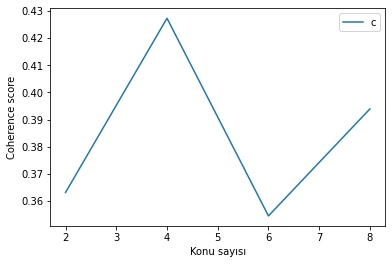

[0.36321142485206137, 0.42732250893768775, 0.3545792029594103, 0.39395260529448617]


In [48]:
def compute_coherence_values(dictionary, corpus, texts, 
                             cohere, limit, start=2, step=2):

    coherence_values = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, 
                         id2word=dictionary, 
                         num_topics=num_topics,
                         chunksize=chunksize,
                         alpha=0.01,
                         eta='symmetric',
                         iterations=iterations,
                         passes=passes,
                         eval_every=eval_every,
                         random_state=100,)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=cohere)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values






limit=10
start=2
step=2
coherence_values = compute_coherence_values(dictionary=dictionary, 
                                            corpus=corpus, 
                                            texts=texts, 
                                            cohere='c_v', 
                                            start=start, 
                                            limit=limit, 
                                            step=step)


x = range(start,limit,step)
plt.plot(x,coherence_values)
plt.xlabel("Konu sayısı")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"),loc='best')
plt.show()






print(coherence_values)

In [49]:
for m, cv in zip(x, coherence_values):
    print("Konu sayısı =", m, "uygunluk değeri: ", round(cv,4))


Konu sayısı = 2 uygunluk değeri:  0.3632
Konu sayısı = 4 uygunluk değeri:  0.4273
Konu sayısı = 6 uygunluk değeri:  0.3546
Konu sayısı = 8 uygunluk değeri:  0.394


2022-07-27 13:24:03,317 : DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
2022-07-27 13:24:03,679 : INFO : using symmetric eta at 0.25
2022-07-27 13:24:03,681 : INFO : using serial LDA version on this node
2022-07-27 13:24:03,692 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 36 documents, updating model once every 6 documents, evaluating perplexity every 0 documents, iterating 100x with a convergence threshold of 0.001000
2022-07-27 13:24:03,692 : INFO : PROGRESS: pass 0, at document #6/36
2022-07-27 13:24:03,693 : DEBUG : performing inference on a chunk of 6 documents
2022-07-27 13:24:03,703 : DEBUG : 6/6 documents converged within 100 iterations
2022-07-27 13:24:03,704 : DEBUG : updating topics
2022-07-27 13:24:03,704 : INFO : merging changes from 6 documents into a model of 36 documents
2022-07-27 13:24:03,706 : INFO : topic #0 (0.010): 0.180*"foreign_language" + 0.180*"professional_development" +

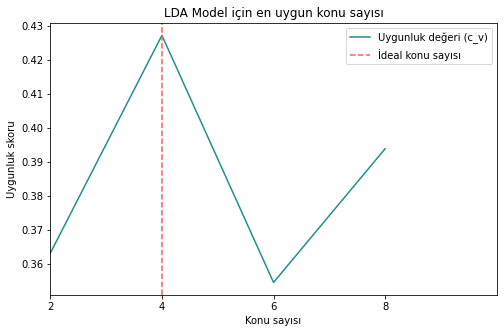

In [50]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,5))

# Create a custom x-axis
x = range(start, limit, step)

# Build the line plot
ax = sns.lineplot(x=x, y=coherence_values, color='#238C8C')

# Set titles and labels
plt.title("LDA Model için en uygun konu sayısı")
plt.xlabel("Konu sayısı")
plt.ylabel("Uygunluk skoru")
plt.xlim(start, limit)
plt.xticks(range(2, limit, step))

# Add a vertical line to show the optimum number of topics
plt.axvline(x[np.argmax(coherence_values)], 
            color='#F26457', linestyle='--')

# Draw a custom legend
legend_elements = [Line2D([0], [0], color='#238C8C', 
                          ls='-', label='Uygunluk değeri (c_v)'),
                   Line2D([0], [1], color='#F26457', 
                          ls='--', label='İdeal konu sayısı')]

ax.legend(handles=legend_elements, loc='upper right')





temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=6,
    alpha=0.01,
    eta='symmetric',
    iterations=100,
    num_topics=4,
    passes=10,
    eval_every=None
    )


In [51]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Baskın_Konu', 'Katkı_Yüzdesi', 'Konu_Anahtar_Kelimeleri']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Belge_No', 'Baskın_Konu', 'Konu_Katkı_Yüzdesi', 'Anahtar_Kelimeler', 'Metin']
df_dominant_topic.head(36)



<ipython-input-51-ea267f55b5f0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-51-ea267f55b5f0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Belge_No,Baskın_Konu,Konu_Katkı_Yüzdesi,Anahtar_Kelimeler,Metin
0,0,2,0.9979,"pedagogical_content, school, teaching, seconda...","[technology, english, language, elt, language,..."
1,1,2,0.9991,"pedagogical_content, school, teaching, seconda...","[technological, pedagogical, content, knowledg..."
2,2,0,0.9991,"professional_development, foreign_language, pr...","[iranian, technological, computer, language, l..."
3,3,0,0.7250,"professional_development, foreign_language, pr...","[technological, pedagogical, content, knowledg..."
4,4,2,0.4724,"pedagogical_content, school, teaching, seconda...","[importance, teacher, technological, pedagogic..."
5,5,3,0.9994,"self_efficacy, foreign_language, integration, ...","[education, twentyfirst, century, competency, ..."
6,6,1,0.9107,"information_communication, ict, design, practi...","[many, teacher, education, preservice, teacher..."
7,7,2,0.8610,"pedagogical_content, school, teaching, seconda...","[order, teaching, training, high, school, engl..."
8,8,1,0.6852,"information_communication, ict, design, practi...","[technological, pedagogical, content, knowledg..."
9,9,0,0.2923,"professional_development, foreign_language, pr...","[technology, foreign, language, teaching, teac..."


/usr/local/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/loc

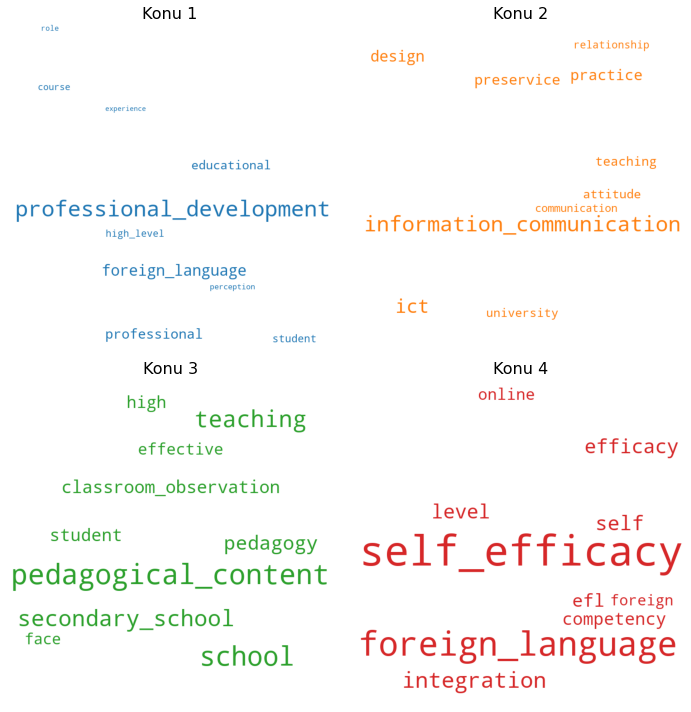

In [52]:
# 1. Wordcloud of Top N words in each topic
import matplotlib
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=720,
                  height=720,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Konu ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [53]:
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline 

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=True)
LDAvis_prepared

2022-07-27 13:26:42,842 : DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
2022-07-27 13:26:42,927 : DEBUG : performing inference on a chunk of 36 documents
2022-07-27 13:26:42,939 : DEBUG : 36/36 documents converged within 100 iterations
/usr/local/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.9/site-packages/past/buil

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.181834  0.005060       1        1  28.821420
1     -0.266393 -0.171197       2        1  25.140888
3      0.201532 -0.085061       3        1  24.468196
2     -0.116973  0.251197       4        1  21.569497, topic_info=                         Term       Freq      Total Category  logprob  loglift
35   professional_development  86.000000  86.000000  Default  30.0000  30.0000
55              self_efficacy  57.000000  57.000000  Default  29.0000  29.0000
32           foreign_language  78.000000  78.000000  Default  28.0000  28.0000
64  information_communication  34.000000  34.000000  Default  27.0000  27.0000
17        pedagogical_content  26.000000  26.000000  Default  26.0000  26.0000
..                        ...        ...        ...      ...      ...      ...
41                  component   1.593487   6.980364   Topic4  -4.9877   0.0567
45              understanding   1.491576   8.529390   Topic4  -5.0538  -0.2098
34               professional   2.611522  28.483575   Topic4  -4.4937  -0.8555
2                  experience   1.529677   9.923805   Topic4  -5.0285  -0.3360
35   professional_development   1.641136  86.131224   Topic4  -4.9582  -2.4266

[159 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
70        2  0.139872       activity
70        4  0.839235       activity
9         2  0.705096    application
9         4  0.352548    application
46        1  0.693410     assessment
...     ...       ...            ...
45        2  0.234483  understanding
45        3  0.586208  understanding
45        4  0.117242  understanding
78        2  0.952775     university
79        2  0.889970          usage

[151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])